In [14]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pylab as plt

from PIL import Image
from glob import glob

plt.style.use("ggplot")

from tkinter import filedialog
from tkinter import *

dir_int = 'E:/Gabriel/deep_motion_mag/data/vids'
dir_out = 'E:/Gabriel/deep_motion_mag/data/output/'

root = Tk()
root.withdraw()

#dir_in_1 = filedialog.askdirectory(initialdir=dir_int) # whti a initial directory
#dir_in_1 = 'E:/Gabriel/deep_motion_mag/data/vids/guitar'
dir_in_1 = filedialog.askdirectory(initialdir=dir_out) #withou any initial directory

print(dir_in_1)
vds1 = glob(dir_in_1 + '\*.png')
print(len(vds1))
img = cv2.imread(vds1[0], 1)
print(img.shape)
dimensions = img.shape
 
# height, width, number of channels in image
height = img.shape[0]
width = img.shape[1]
channels = img.shape[2]
 
print('Image Dimension    : ',dimensions)
print('Image Height       : ',height)
print('Image Width        : ',width)
print('Number of Channels : ',channels)

def mkdir(path):
    try:
        os.makedirs(path, exist_ok = True)
        print("Directory '%s' created successfully" % path)
    except OSError as error:
        print("Directory '%s' can not be created" % path)

E:/Gabriel/deep_motion_mag/data/output/vid_20221202_cam_0_a_Amp5.0_velocity_mag_False
17
(1080, 1920, 3)
Image Dimension    :  (1080, 1920, 3)
Image Height       :  1080
Image Width        :  1920
Number of Channels :  3


 Formato da matriz base para adição é: (1, 1920, 3). 
 A quantidade de vídeos na pasta é: 17. 
 Por isso, o passo para cada imagem será 64. 
 Por fim o delta entre as imagens será de:± 4 pixel
 Assim, a variação dos pixeis será de: 983 a 991


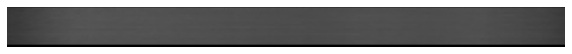

Directory 'E:/Gabriel/deep_motion_mag/data/output/vid_20221202_cam_0_a_Amp5.0_velocity_mag_False\cut_ouput' created successfully


In [15]:
#empilhamento em y

#final_crop_gray = np.zeros((1, height), dtype= int)

#########
base_value = 987
#########

final_crop_colored = np.zeros((1, width, 3), dtype= int)

setp = round((height/len(vds1)))

j = int(setp/2)

if j < 1:
    j = 1

j = 4    

y1 = base_value - j
y2 = base_value + j

print( 
       
       " Formato da matriz base para adição é: {forma}.".format(forma = final_crop_colored.shape) + 
       " \n A quantidade de vídeos na pasta é: {n_vids}.".format(n_vids = len(vds1)) +
       " \n Por isso, o passo para cada imagem será {passo}.".format(passo = setp) +
       u" \n Por fim o delta entre as imagens será de:\u00B1 {jota} pixel".format( jota = j) +
       "\n Assim, a variação dos pixeis será de: {valor1} a {valor2}".format(valor1 = y1, valor2 = y2)
       
       )


for i in range(len(vds1)):
    #print("\n")
    #print("Final crop colored shape:",final_crop_colored.shape)
    img_mp1 = cv2.imread(vds1[i])
    #print("img mp1 shape:",img_mp1.shape)
    img_mp1_crop = img_mp1[y1:y2,:,:]
    #print("img_mp1_crop.shape:",img_mp1_crop.shape)
    final_crop_colored = np.append(final_crop_colored, img_mp1_crop, axis=0)
    #print("Final crop colored shape:",final_crop_colored.shape)
    
 

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(final_crop_colored)
ax.axis('off')
plt.show()

"""file_name = tail + "_time_evolution_forY"+ str(base_value) +"_pixel"+".png"

cv2.imwrite(os.path.join(dir_in_1, file_name),final_crop_gray)"""


head, tail = os.path.split(dir_in_1)
file_name_colored = tail + "_time_evolution_colored_YStacking_for_Y"+ str(base_value) +"_pixel"+".png"

dir2 = os.path.join(dir_in_1, "cut_ouput")

mkdir(dir2)

cv2.imwrite(os.path.join(dir2, file_name_colored),final_crop_colored)

final_crop_gray = None
final_crop_colored = None

In [16]:
#Empilhamento em x

#########
base_value= 441
#########

final_crop_colored2 = np.zeros((height, 1, 3), dtype= int)

setp = round((width/len(vds1)))

j = int(setp/2)

if j < 1:
    j = 1

j = 1

x1 = base_value - j
x2 = base_value + j

print( 
       
       " Formato da matriz base para adição é: {forma}.".format(forma = final_crop_colored2.shape) + 
       " \n A quantidade de figuras na pasta é: {n_vids}.".format(n_vids = len(vds1)) +
       " \n Por isso, o passo para cada imagem será {passo}.".format(passo = setp) +
       u" \n Por fim o delta entre as imagens será de:\u00B1 {jota} pixel".format( jota = j) +
       "\n Assim, a variação dos pixeis será de: {valor1} a {valor2}".format(valor1 = x1, valor2 = x2)
       
       )


for i in range(len(vds1)-1):
    #print("\n")
    #print(len(vds1))
    #print("Final crop colored shape:",final_crop_colored2.shape)
    img_mp2 = cv2.imread(vds1[i])
    #print("img mp1 shape:",img_mp2.shape)
    img_mp2_crop = img_mp2[:,x1:x2,:]
    #print("img_mp1_crop.shape: ", img_mp2_crop.shape)
    final_crop_colored2 = np.append(final_crop_colored2, img_mp2_crop, axis=1)
    #print("Final crop colored shape:",final_crop_colored2.shape)
 

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(final_crop_colored2)
ax.axis('off')
plt.show()

"""file_name = tail + "_time_evolution_forY"+ str(base_value) +"_pixel"+".png"

cv2.imwrite(os.path.join(dir_in_1, file_name),final_crop_gray)"""



head, tail = os.path.split(dir_in_1)
file_name_colored2 = tail + "_time_evolution_XStacking_colored_for_X"+ str(base_value) +"_pixel"+".png"

dir2 = os.path.join(dir_in_1, "cut_ouput")

mkdir(dir2)

cv2.imwrite(os.path.join(dir2, file_name_colored2),final_crop_colored2)

final_crop_gray = None
final_crop_colored2 = None

 Formato da matriz base para adição é: (1080, 1, 3). 
 A quantidade de figuras na pasta é: 17. 
 Por isso, o passo para cada imagem será 113. 
 Por fim o delta entre as imagens será de:± 1 pixel
 Assim, a variação dos pixeis será de: 440 a 442


Directory 'E:/Gabriel/deep_motion_mag/data/output/vid_20221202_cam_0_a_Amp5.0_velocity_mag_False\cut_ouput' created successfully


 Formato da matriz base para adição é: (190, 1, 3). 
 A quantidade de vídeos na pasta é: 17. 
 Por isso, o passo para cada imagem será 113. 
 Por fim o delta entre as imagens será de:± 10 pixel
 Assim, a variação dos pixeis será de: 1224 a 1244


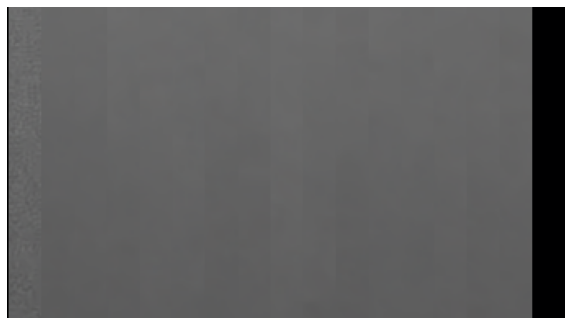

Directory 'E:/Gabriel/deep_motion_mag/data/output/vid_20221202_cam_0_a_Amp5.0_velocity_mag_False\cut_ouput' created successfully


In [17]:
#Tempo em x e corte em y

#########
base_value= 1234
#########

#final_crop_colored2 = np.zeros((height, 1, 3), dtype= int)

p1 = (1217,393)
p2 = (1217,583)

delta_y = abs(p1[1]-p2[1])

final_crop_colored2 = np.zeros((delta_y, 1, 3), dtype= int)


setp = round((width/len(vds1)))

j = int(setp/2)

if j < 1:
    j = 1

j = 10

x1 = base_value - j
x2 = base_value + j

print( 
       
       " Formato da matriz base para adição é: {forma}.".format(forma = final_crop_colored2.shape) + 
       " \n A quantidade de vídeos na pasta é: {n_vids}.".format(n_vids = len(vds1)) +
       " \n Por isso, o passo para cada imagem será {passo}.".format(passo = setp) +
       u" \n Por fim o delta entre as imagens será de:\u00B1 {jota} pixel".format( jota = j) +
       "\n Assim, a variação dos pixeis será de: {valor1} a {valor2}".format(valor1 = x1, valor2 = x2)
       
       )


for i in range(len(vds1)):
    #print("\n")
    #print("Final crop colored shape:",final_crop_colored2.shape)
    img_mp2 = cv2.imread(vds1[i])
    #print("img mp1 shape:",img_mp2.shape)
    img_mp2_crop = img_mp2[p1[1]:p2[1],x1:x2,:]
    #print("img_mp1_crop.shape: ", img_mp2_crop.shape)
    final_crop_colored2 = np.append(final_crop_colored2, img_mp2_crop, axis=1)
    #print("Final crop colored shape:",final_crop_colored2.shape)
    #print("\n")
 

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(final_crop_colored2)
ax.axis('off')
plt.show()

"""file_name = tail + "_time_evolution_forY"+ str(base_value) +"_pixel"+".png"

cv2.imwrite(os.path.join(dir_in_1, file_name),final_crop_gray)"""


head, tail = os.path.split(dir_in_1)
file_name_colored = tail + "_time_evolution_colored_for_Y"+ str(base_value) +"_pixel"+".png"

dir2 = os.path.join(dir_in_1, "cut_ouput")

mkdir(dir2)

cv2.imwrite(os.path.join(dir2, file_name_colored),final_crop_colored2)

final_crop_gray = None
final_crop_colored2 = None